<a href="https://colab.research.google.com/github/andresf-sierra/tecnicas_iq_con_python/blob/main/bioprocesos_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####  ***Andrés F. Sierra***

  *Estudiante de Ingeniería Química y Ciencia de Datos*

  *Campus Rep 2021* 

  *Diplomado en Análisis de Datos y Machine Learning en Python*
  

 <!-- badges: start -->
[![Andres Sierra](https://img.shields.io/badge/LinkedIn-blue?&logoColor=white)](https://www.linkedin.com/in/andresf-sierra/) 
[![Andres Sierra](https://img.shields.io/badge/GitHub-green?&logoColor=white)](https://github.com/andresf-sierra)
<!-- badges: end -->





#**Técnica 1 - Resolución de sistema de ecuaciones lineales**


##Columna de separación de destilación para la separación de metano, etano y propano.

- Diagrama de una columna de destilación para la separación gruesa de Metano (M), Etano (E), y propano (P)



###***Balance de Materia***






In [ ]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import sympy
import numpy as np


In [ ]:
# Versiones
#print("Version: ", tf.__version__)
print("Version: ", pd .__version__)
print("Version: ", sns .__version__)

plt.close('all')
plt.style.use('ggplot')


Version:  1.1.5
Version:  0.11.1


In [ ]:
#%% Resolución de sistemas de ecuaciones lineales
# Solucion analítica 
# Declaración de variables simbolicas
m1, m2, m3 = sympy.symbols('m1 m2 m3')
# Asignación de ecauaciones
eq1 = 0.9*m1 + 0.3*m2 + 0.1*m3 - 30
eq2 = 0.1*m1 + 0.5*m2 + 0.2*m3 - 25
eq3 = 0.2*m2 + 0.7*m3 - 10
# Solucion del sistema de ecuaciones
Solucion = sympy.solve([eq1,eq2,eq3],[m1,m2,m3])
# Impresion de la solucion
print(Solucion)


{m1: 17.8846153846154, m2: 45.9615384615385, m3: 1.15384615384615}


In [ ]:
# Solución numerica
Matriz_Balances = np.array([[0.9,0.3,0.1],[0.1,0.5,0.2],[0.0,0.2,0.7]])
Alimentacion = np.array([30.0,25.0,10.0])
# Impresion de las matrices
print(Matriz_Balances)
print(Alimentacion)

import numpy.linalg as nl
Solucion_2  = nl.solve(Matriz_Balances,Alimentacion)
print(Solucion_2)


[[0.9 0.3 0.1]
 [0.1 0.5 0.2]
 [0.  0.2 0.7]]
[30. 25. 10.]
[17.88461538 45.96153846  1.15384615]


#**Técnica 2 - Ajuste de ecuaciones algebraicas no lineales a datos experimentales**


$log_{10}p = A - frac{B}{C+T}$

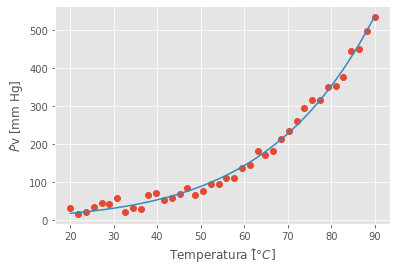

In [ ]:
#%% Ajuste de ecuaciones algebraicas no lineales a datos experimentales
from scipy.optimize import curve_fit
import pylab
# Cantidad de datos experimentales modelados
n = 40
# Coeficientes de la ecuación de Antoine para el Agua (Wikipedia)
A = 8.07131
B = 1730.63
C = 233.426
# Construimos una muestra de datos de temperatura: temperatura (Temperatura), versus presion de vapor (Pvapor)
Temperatura= np.linspace(20,90,num=n)
Pvapor = np.zeros(n)
error = np.random.rand(n)

for i in range(n):
    Pvapor[i] = A - B/(Temperatura[i]+C)
    Pvapor[i] = (10**Pvapor[i])+50*(error[i]-0.5)

def antoine(temp, a, b, c):
  n = temp.size
  p = np.zeros(n)
  for i in range(n):
    p[i] = 10**(a - b/(temp[i]+c))
  return p

#Estimados iniciales para la Ec. de Antoine

params =[10, 2000, 200]
# Rutina de optimización que encuentra los parametros
popt, pcov = curve_fit(antoine, Temperatura, Pvapor, p0=params)

# Calculo de la estimacion del modelo
yfit = antoine(Temperatura, popt[0], popt[1], popt[2])

# Plot de los datos modelados y experimentales
pylab.plot(Temperatura,Pvapor,'o',Temperatura, yfit)
pylab.xlabel('Temperatura [$ ̂ °C$]')
pylab.ylabel('$P ̂ $v [mm Hg]')
pylab.show()



#**Técnica 3 - resolución ecuaciones no lineales**

Ecuaciones coonstitutiva

EOS SRK



In [ ]:
#%% Resolución de ecuaciones no lineales
import math
import scipy.optimize

# Funcion que contiene la estructura no lineal de la EOS SRK
def SRK(V):
    # Propiedades para el monoxido de carbono
    T = 300 # K
    P = 10 # atm
    Tc = 133.0 # K
    Pc = 34.5 # atm
    w = 0.049 # Factor acéntrico for CO
    R = 0.08206 # L atm / (mol K)
    a = 0.42747*(R*Tc)**2 / (Pc)
    b = 0.08664*(R*Tc/Pc)
    m = 0.48508+1.55171*w-0.1561*w**2
    alpha = (1+m*(1-math.sqrt(T/Tc)))**2
    term1 = R*T/(V-b)
    term2 = alpha*a/(V*(V+b))
    return P-term1+term2

V = 2.0 # L/mol, Estimado inicial
# Función de optimización que calcula el valor del volumen
V = scipy.optimize.broyden1(SRK, V, maxiter=100, f_tol=1e-6)
print(V) # (L)


2.4588989615210477


#**Técnica 4 - resolución de problemas de valor inicial**

Michaelis-Menten



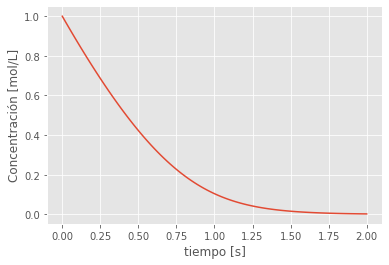

In [ ]:
#%% Integracion de ecuaciones diferenciales
# Metodo de Euler
import numpy as np
import pylab

# Parametros del modelo cinetico
Vmax = 2.0  # [mol/(L*s)]
Km = 0.5    # [mol/L]

# Definición de la EDO
def df(s,t):
    dsdt = -Vmax*s /(Km+s)
    return dsdt

# Discretización del tiempo
n = 100                     # Pasos en el tiempo
t = np.linspace(0,2.0,n)
dt = t[1]-t[0]              # DeltaT

# Prelocalizar el vector de la solucion y establecer las condiciones iniciales
sol = np.zeros(n)
sol[0] = 1.0 # initial S in mol / L

for i in range(1,n):
    sol[i] = sol[i-1]+ dt*df(sol[i-1],t[i-1])

# Figuras de resutados
plt.close('all')
plt.style.use('ggplot')
pylab.plot(t,sol)
pylab.xlabel("tiempo [s]")
pylab.ylabel("Concentración [mol/L]")
pylab.show()


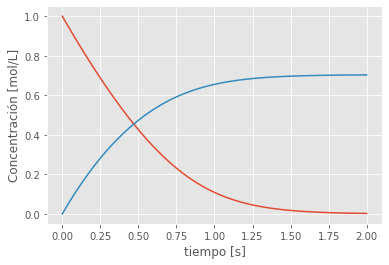

In [ ]:
#%% Integración con rutinas de scipy
import numpy
from scipy.integrate import odeint

# Definición de la EDO
def df(c,t):
    s = c[0] # substrate concentration
    p = c[1] # product concentration
    dsdt = -Vmax*s /(Km + s)
    dpdt = Vmax*s /(Km + s + p)
    return np.array([dsdt,dpdt])

# Condiciones inciales y tiempo de integración
c0 = numpy.array([1.0, 0.0]) # [mol / L]
t = numpy.linspace(0,2.0,n)

# Integracion del modelo
sol = odeint(df, c0, t)

pylab.plot(t,sol)
pylab.xlabel("tiempo [s]")
pylab.ylabel("Concentración [mol/L]")
pylab.show()


#**Técnica 5 - resolución de problemas con condiciones de borde en estado estacionario**


- Método de las diferencias finitas: requiere dividr el dominio, a menor igual que x y menos igual que b en un conjunto de puntos discretos o nodos con sus localizaciones dadas por xi. 

$\frac{d^2y}{dx^2} + a(x) \frac{dx}{dx} +b(x) \cdot y = c(x),$


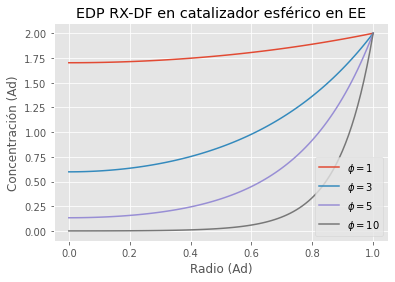

In [ ]:
from numpy.linalg import solve
import matplotlib.pyplot as plt

# Funcion que contiene el mallado de la ecuacion DF-RX en EE para coordenadas cilindricas
def perfil_concentracion(phi):    
    N = 99 # Numero de intervalos
    
    # Espaciamiento de puntos de diferencia finita
    r = np.linspace(0,1.0,N+1)
    h = r[1]-r[0]
    
    # Matriz y vector columna que representan a la geomtria
    A = np.zeros((N+1,N+1))
    b = np.zeros(N+1)
    
    # Condición de borde de simetría en r=0
    A[0,0] = -1.0
    A[0,1] = 1.0
    b[0] = 0.0
    
    # Bucle central de calculo para todos los nodos
    for i in range(1,N):
        A[i,i-1] = 1.0 - h/r[i]
        A[i,i] = -2.0 - phi**2 * h**2
        A[i,i+1] = 1.0 + h/r[i]
        b[i] = 0.0
    
    # Condición de borde en r = 1
    A[N,N] = 1.0
    b[N] = 2.0
    c = solve(A,b)
    
    return ([c,r])

# Calculos para cada uno de los modulos de Thiele
c,r = perfil_concentracion(1)
c3,r3 = perfil_concentracion(3)
c5,r5 = perfil_concentracion(5)
c10,r10 = perfil_concentracion(10)

# Figuras de resultados
plt.plot(r,c,r3,c3,r5,c5,r10,c10)
plt.xlabel('Radio (Ad)')
plt.ylabel('Concentración (Ad)')
plt.title('EDP RX-DF en catalizador esférico en EE')
plt.legend('','')
plt.legend(["$\phi = 1$", "$\phi = 3$", "$\phi = 5$", "$\phi = 10$"], loc ="lower right")



#**Técnica 6 - resolución EDO acopladas con ecuaciones algebraicas constitutivas**

- Obtención de metil acetato a partir de ácido acético y metanol (destilación reactiva)

Parámetros y condciones iniciales

- Peso molecular de cada parámetro
- Densidad
- Temp Reducida
- T del sistema
- P del sistema
- Moles iniciales del acido acético
- Concentración
- Flujo


**Ecuaciones diferenciales**





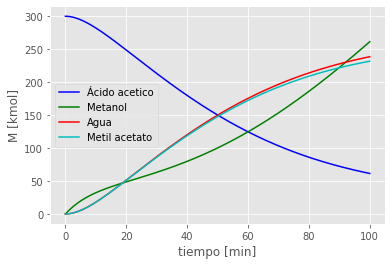

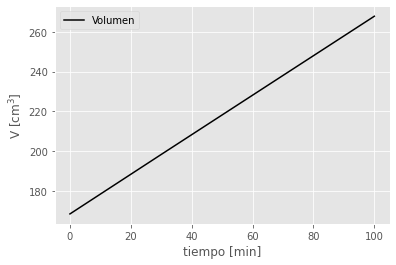

In [ ]:
#%% Ecuaciones diferenciales acopladas con ecuaciones alebraicas
# from scipy import optimize
from scipy import integrate

# Definicion de parametros y condiciones iniciales
N_AA_0=300                  # Moles iniciales de acido acetico (AA) [kmol]
MW_AA=60                    # Peso molecular (AA) [g/mol] 
rho_AA=106.9                # Densidad AA [g/cm3]
MW_AAMe=74.1                # Peso molecular metil acetato (AAMe) [g/mol]
rho_AAMe=943.4              # Densidad AA_Me [g/cm3]
T=300                       # Temperatura [K]
T_r=T/506.5                 # Temperature reducida
P_tot=101                   # Presion [kPa]
V_0=N_AA_0*MW_AA/rho_AA     # Volumen inicial en el reactor [cm3]

# Variables
k=(8.8E8)*np.exp(-7032.1/T)
K_eq=5.2*np.exp(-(8000/1.978)*(1/298-1/T))
P_vap=4750*np.exp(10.703-(11.0088/T_r)-5.431*np.
log(T_r)+0.3058*T_r**6)


#  La lista vacía N se crea para guardar la variación del número de moles de cada componente 
# en los cuatro primeros lugares y la variación del volumen en la última posición
N=[(),(),(),(),()]
# La lista vacía Conc se crea para guardar la variación de concetración
Conc=[(),(),(),()]
# Se define una función que recoge las ecuaciones a resolver


def kinetics (N,t):
    
    # Cálculo de la concentración de cada componente
    Conc[0]=N[0]/N[4]
    Conc[1]=N[1]/N[4]
    Conc[2]=N[2]/N[4]
    Conc[3]=N[3]/N[4]
    
    # Velocidad de reacción del ácido acético
    r_AA=k*(Conc[1]*Conc[0]-Conc[3]*Conc[2]/K_eq)
    
    # Ecuaciones consitutivas
    x_AAMe=N[3]/(N[0]+N[1]+N[2]+N[3])   # Fracción molar de metil acetato
    F_AAMe=x_AAMe*P_vap/P_tot           # Flujo de metil acetato eliminado
    v_0=1                               # Caudal volumétrico de entrada
    C_MetOH_0=5                         # Concentración inicial de MetOH
    F_MetOH_0=v_0*C_MetOH_0             # Flujo molar de entrada de MetOH
    alpha=MW_AAMe/rho_AAMe              # Parametro alpha
    
    # Ecuaciones diferenciales
    # Prelocalizacion del vector solucion
    dNdt=np.zeros(5)
    
    dNdt[0] = -r_AA*N[4]
    dNdt[1] = -r_AA*N[4]+F_MetOH_0
    dNdt[2] = r_AA*N[4]
    dNdt[3] = r_AA*N[4]-F_AAMe
    dNdt[4] = v_0-F_AAMe*alpha
    return dNdt


# Creación de la matriz de tiempo sobre las ecuaciones se evaluará
t=np.linspace(0,100,500)
# Condiciones iniciales
N_ini=[N_AA_0, 0, 0, 0, V_0]
# Rutina de integración de sistemas EDOE
Res=integrate.odeint(kinetics,N_ini,t)

# Figuras de resultados
fig,axes=plt.subplots()
axes.plot(t,Res[:,0],'b', label='Ácido acetico')
axes.plot(t,Res[:,1],'g', label='Metanol')
axes.plot(t,Res[:,2],'r', label='Agua')
axes.plot(t,Res[:,3],'c', label='Metil acetato')
axes.set_xlabel('tiempo [min]')
axes.set_ylabel('M [kmol]')
axes.grid('on') # Activar grilla
legend = axes.legend(loc='best', fontsize='medium') # Leyenda

# Variacion del volumen 
fig,axes=plt.subplots()
axes.plot(t,Res[:,4],'k', label='Volumen')
axes.set_xlabel('tiempo [min]')
axes.set_ylabel('V [cm$^3$]')
axes.grid('on')
legend = axes.legend(loc='best', fontsize='medium')
